##Link and information on the dataset used -    

The dataset used for the purpose of our project is the precipitation dataset for the city of Los Angeles our the years 2016 to 2020. The dataset consists of various parameters like Average Wind Speed (AWND), Precipitation (PRCP), Max Temperature (TMAX), Min Temperature (TMIN), Fastest-2 minute wind speed (WSF2), Fastest-5 minute wind speed (WSF5), Direction of fastest 2-minute wind (WDF2), Direction of fastest 5-minute wind (WDF5).  
Link to dataset - https://drive.google.com/file/d/1KgP4ctGWVXie09dyLuv1bDFgchlMB1Dz/view


---






Firstly, we start by importing the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

Import the rainfall dataset in a dataframe named as ' df '.

In [ ]:
df= pd.read_csv('dataset (1).csv')
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


But by the first observation of the dataset, it can be seen that the data consists of NaN values for several values. Some of the columns like 'WT01' and 'WT08' are replaced by the mode value for all the missing values. Also, some of the columns like 'PGTM', 'TAVG', 'WT02' are less relevant and can be removed.

In [ ]:
df=df.dropna(axis=1,thresh=100)
df['WT01'].fillna(df['WT01'].mode()[0], inplace=True)
df['WT08'].fillna(df['WT08'].mode()[0], inplace=True)
df

<ipython-input-8-583817f94126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WT01'].fillna(df['WT01'].mode()[0], inplace=True)
<ipython-input-8-583817f94126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WT08'].fillna(df['WT08'].mode()[0], inplace=True)


,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.00,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.00,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.00,62,44,150.0,150.0,10.1,14.1,1.0,1.0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,0.01,69,55,270.0,280.0,8.1,14.1,1.0,1.0
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.61,59,49,140.0,140.0,10.1,16.1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,0.01,66,55,270.0,260.0,8.9,18.1,1.0,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,1.81,56,47,90.0,260.0,14.1,21.0,1.0,1.0
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,0.00,65,42,340.0,360.0,10.1,18.1,1.0,1.0
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,0.00,69,44,260.0,260.0,6.9,12.1,1.0,1.0


Moreover, for our analysis, we drop the columns 'WT01', 'WT08', 'STATION', 'NAME', 'DATE'.

In [ ]:
date= df['DATE']
df=df.drop(columns=['WT01','WT08','STATION','NAME','DATE'])
df

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.46,0.00,64,43,10.0,30.0,8.1,11.0
1,2.01,0.00,65,47,270.0,30.0,6.0,8.9
2,0.67,0.00,62,44,150.0,150.0,10.1,14.1
3,1.34,0.01,69,55,270.0,280.0,8.1,14.1
4,2.46,1.61,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...
1822,1.12,0.01,66,55,270.0,260.0,8.9,18.1
1823,4.70,1.81,56,47,90.0,260.0,14.1,21.0
1824,1.57,0.00,65,42,340.0,360.0,10.1,18.1
1825,0.45,0.00,69,44,260.0,260.0,6.9,12.1


Now for all the remaining colummns, we plot the histograms of these variables in each column.

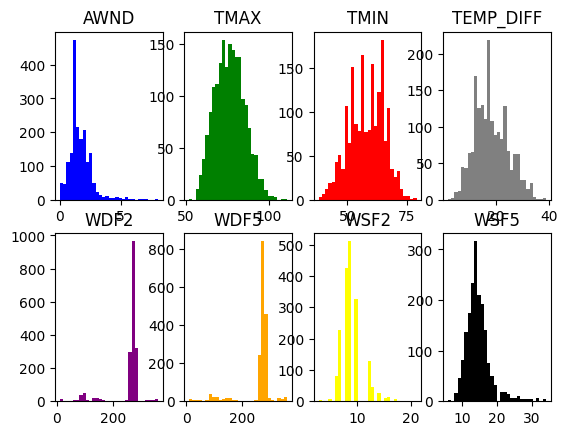

In [ ]:
colors = ['blue', 'green', 'red', 'grey', 'purple', 'orange', 'yellow', 'black']
df['TEMP_DIFF']=df['TMAX']-df['TMIN']
fig,axs= plt.subplots(2,4)
axs[0,0].hist(df['AWND'], bins = 30, color=colors[0])
axs[0,0].set_title('AWND')
axs[0,1].hist(df['TMAX'], bins = 30, color=colors[1])
axs[0,1].set_title('TMAX')
axs[0,2].hist(df['TMIN'], bins = 30, color=colors[2])
axs[0,2].set_title('TMIN')
axs[0,3].hist(df['TEMP_DIFF'], bins = 30, color=colors[3])
axs[0,3].set_title('TEMP_DIFF')
axs[1,0].hist(df['WDF2'], bins = 30,color=colors[4])
axs[1,0].set_title('WDF2')
axs[1,1].hist(df['WDF5'], bins = 30,color=colors[5])
axs[1,1].set_title('WDF5')
axs[1,2].hist(df['WSF2'], bins = 30, color=colors[6])
axs[1,2].set_title('WSF2')
axs[1,3].hist(df['WSF5'], bins = 30, color=colors[7])
axs[1,3].set_title('WSF5')
plt.show()

We are interested in knowing the correlation of the various variables which can be known using the correlation matrix.

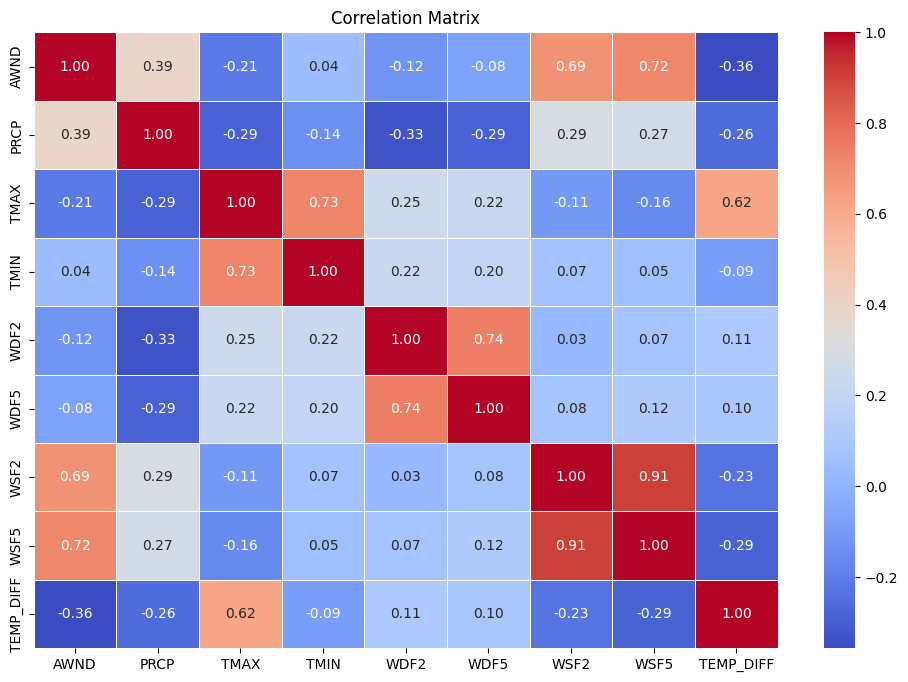

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Now, we wish to know the data as per the year for further analysis.

In [ ]:
for i in range(len(date)):
   date[i]= date[i][:4]
date= pd.DataFrame(date)
df['YEAR']= date

In [ ]:
df

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,TEMP_DIFF,YEAR
0,2.46,0.00,64,43,10.0,30.0,8.1,11.0,21,2016
1,2.01,0.00,65,47,270.0,30.0,6.0,8.9,18,2016
2,0.67,0.00,62,44,150.0,150.0,10.1,14.1,18,2016
3,1.34,0.01,69,55,270.0,280.0,8.1,14.1,14,2016
4,2.46,1.61,59,49,140.0,140.0,10.1,16.1,10,2016
...,...,...,...,...,...,...,...,...,...,...
1822,1.12,0.01,66,55,270.0,260.0,8.9,18.1,11,2020
1823,4.70,1.81,56,47,90.0,260.0,14.1,21.0,9,2020
1824,1.57,0.00,65,42,340.0,360.0,10.1,18.1,23,2020
1825,0.45,0.00,69,44,260.0,260.0,6.9,12.1,25,2020


We can visualise the precipitation for every year separately in the plot below.

Text(0.5, 1.0, 'Precipitation in different years')

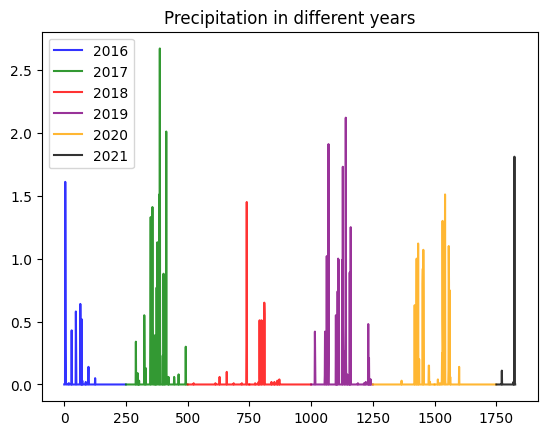

In [ ]:
colors = ['blue', 'green', 'red', 'red', 'purple', 'orange', 'orange', 'black']
labels= ['2016', '2017', '2018', '', '2019', '', '2020', '2021']
for i in range(0, len(df), 250):
    plt.plot(df.index[i:i+250], df['PRCP'][i:i+250], color=colors[i//250 % len(colors)], alpha=0.8, label= labels[i//250 % len(labels)])

plt.legend()
plt.title('Precipitation in different years')


##Step 3 -

We now wish to formulate the hypothesis that compares the average minimum temperatures at Los Angeles taking the level of significance to be 5%. We define the Null and Alternate hypothesis as follows:    

Null Hypothesis (H0): The average minimum temperature at Los Angeles is the same in the years 2017 and 2018. (i.e mu_2017 = mu_2018)  
Alternate Hypothesis (H1): The average minimum temperature at Los Angeles is not the same during 2017 and 2018.  

For this we first calculate the sample means and variances for the variable 'TMIN' and perform the two sided hypothesis testing on the data.

In [ ]:
df_TMIN_2017= df[df['YEAR']=='2017']['TMIN']
df_TMIN_2018= df[df['YEAR']=='2018']['TMIN']

sample_mean_17 = df_TMIN_2017.mean()
sample_mean_18 = df_TMIN_2018.mean()

std_17 = df_TMIN_2017.std(ddof=1)
std_18 = df_TMIN_2018.std(ddof=1)

sample_mean_17, sample_mean_18, std_17, std_18

(58.76164383561644, 58.07671232876712, 7.402899456787451, 7.696483436829546)

Now using the t-distribution, we can calculate the test statistic and consequently, the p-value for the test.

In [ ]:
n_17, n_18= df_TMIN_2018.shape, df_TMIN_2017.shape
act_std = (std_17**2/n_17[0] + std_18**2/n_18[0])**0.5
z = (sample_mean_17 - sample_mean_18)/act_std
from scipy.stats import t

alpha = 0.05
p = 2*(1 - t.cdf(z, n_17[0] + n_18[0] - 2))
p

0.220832070781519

From the above analysis, it is found the the p-value for the above test comes out to be 0.22, which is much greater than the alpha value. Thus, we can say that we fail to reject the Null hypothesis.  

So, from the hypothesis testing, we can conclude that the average minimum temperature during the years 2017 and 2018 can be said to be equal.

The result obtained tells us that there was no significant change in the min. temperatures in the subsequent year 2017 and 2018. This result kind off justifies that a region has a specific climate conditions.

##Step 4 -

Now we would focus on analysing the relationship between two chosen variables. For the analysis, we choose the variables 'WSF2' and 'WSF5'. From the correlation matrix, it can be seen that the correlation between these two variables is as high as 0.91. This can be visibly seen from the scatter plot between the two variables.

Text(0.5, 1.0, 'WSF5 VS WSF2')

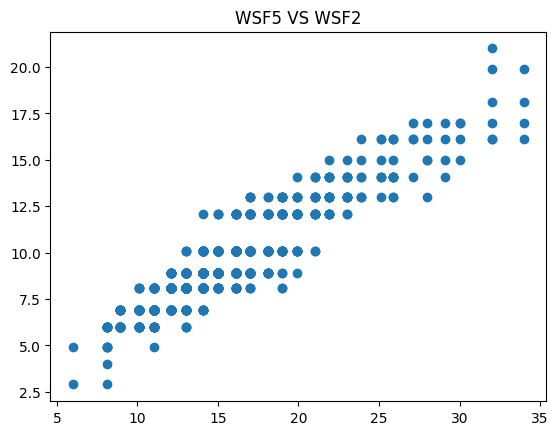

In [ ]:
plt.scatter(df['WSF5'], df['WSF2'])
plt.title('WSF5 VS WSF2')

For further analysis, we perforn regression on the dataset.(Note that the scatterplot, is made in the way that it can depict the density of points on the figure through the gradient in the colour). We get a curve fitting line that optimizes the l2 error function.

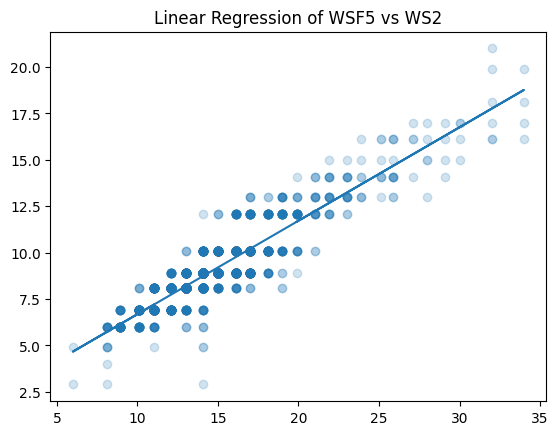

In [ ]:
from sklearn.linear_model import LinearRegression

df['WSF2'].fillna(df['WSF2'].mode()[0], inplace=True)
df['WSF5'].fillna(df['WSF5'].mode()[0], inplace=True)

x,y= np.array(df['WSF5']), np.array(df['WSF2'])
slope, intercept = np.polyfit(x, y, 1)
y_pred= x*slope+intercept
plt.scatter(x,y, alpha=0.2)
plt.plot(x,y_pred)
plt.title('Linear Regression of WSF5 vs WS2')
plt.show()

Point Estimates for the regression curve.

In [ ]:
print('Point Estimate for alpha is ', intercept)
print('Point Estimate of beta is ', slope)

Point Estimate for alpha is  1.6553877654860825
Point Estimate of beta is  0.5033013041497378


Defining the residual terms.

In [ ]:
Sxy= np.sum(x*y)- x.size*np.mean(x)*np.mean(y)
Sxx= np.sum(x*x)- x.size*(np.mean(x))**2
Syy= np.sum(y*y)- x.size*(np.mean(y))**2
Ssr= (Sxx*Syy- (Sxy)**2)/Sxx

## Confidence intervals for Alpha and Beta

With the help of pre-known results for calculating the confidence interval, we obtain the confidence interval for alpha and beta. These are the interval estimates for alpha and beta.

In [ ]:
import math
CI_B_lower= slope- math.sqrt(Ssr/((x.size-2)*Sxx))*t.cdf(0.025, x.size-2)
CI_B_higher= slope+ math.sqrt(Ssr/((x.size-2)*Sxx))*t.cdf(0.025, x.size-2)
CI_A_lower= intercept- t.cdf(0.025, x.size-2)*math.sqrt((Ssr*np.sum(x*x))/(x.size*(x.size-2)*Sxx))
CI_A_higher= intercept+ t.cdf(0.025, x.size-2)*math.sqrt((Ssr*np.sum(x*x))/(x.size*(x.size-2)*Sxx))
print('Confidence intervals for Beta is (',CI_B_lower, ' ,',CI_B_higher, ')')
print('Confidence intervals for Alpha is (',CI_A_lower, ' ,',CI_A_higher, ')')

Confidence intervals for Beta is ( 0.500401340819497  , 0.5062012674799786 )
Confidence intervals for Alpha is ( 1.611452094050025  , 1.69932343692214 )


Now we will verify whether the regression model fitted on the data is relevant. For this, we will first visualise residuals errors between predicted value and actual value.

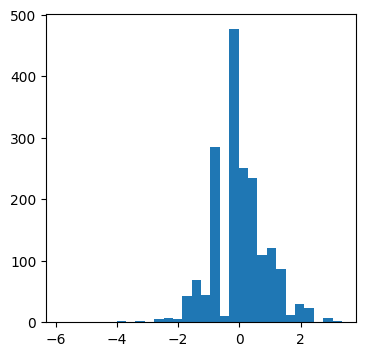

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.hist(y-y_pred, bins=30)
plt.show()

<Figure size 300x300 with 0 Axes>

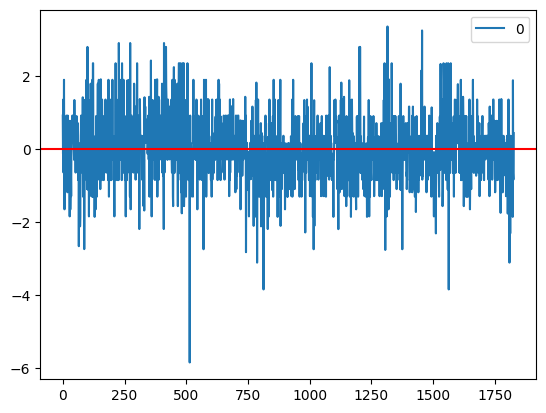

In [ ]:
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(3)
pd.DataFrame(y-y_pred).plot()
plt.axhline(y=0, c='r')
plt.show()

To verify the validity of the regression model, we will perform a two-sided hypothesis test with a level of significance of 1%.  

Null Hypothesis (H0): Mean of residual = 0  
Alternate Hypothesis (H1): Mean of residual is not 0

In [ ]:
sample_mean= np.mean(y-y_pred)
sample_std= np.std(y-y_pred, ddof=1)
u=0
z= (sample_mean- u)/(sample_std/math.sqrt(x.size))
z_lower= u- t.cdf(0.005, x.size-2)
z_higher= u+ t.cdf(0.005, x.size-2)
print('Confidence intervals for Test statistics is (',z_lower, ' ,',z_higher, ')')
print('Value of Test Statistics is ',z)

Confidence intervals for Test statistics is ( -0.5019944298579171  , 0.5019944298579171 )
Value of Test Statistics is  -5.140437822417571e-13


Since the test statistics lies in the acceptance region i.e the confidence interval for the test statistics, we fail to reject the Null Hypothesis. This implies that using Linear regression was a good choice for our analysis. We can say this with 99% confidence.

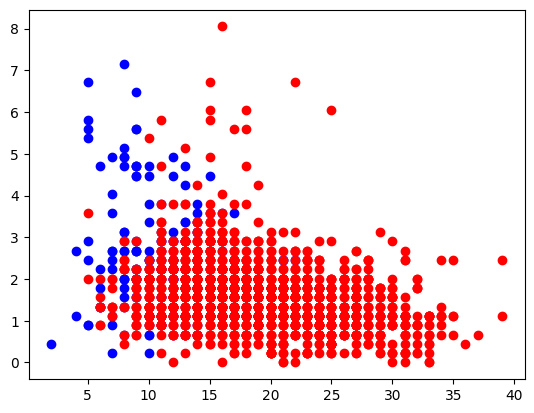

In [ ]:
from sklearn.model_selection import train_test_split

df.loc[df["PRCP"] > 0.0, "PRCP"] = 1.0
df_x= df.drop(columns= ['PRCP', 'YEAR'])
df_y= df['PRCP']
df_x = df_x.fillna(df_x.mode().iloc[0])
df_y = df_y.fillna(df_y.mode().iloc[0])
df_y= pd.DataFrame(df_y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
plt.scatter(df.loc[df['PRCP'] == 1, 'TEMP_DIFF'],
            df.loc[df['PRCP'] == 1, 'AWND'],
            color='blue', label='Rain Occurred')

plt.scatter(df.loc[df['PRCP'] == 0, 'TEMP_DIFF'],
            df.loc[df['PRCP'] == 0, 'AWND'],
            color='red', label='No Rain')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
df=df.dropna(axis=1,thresh=100)

imputer = SimpleImputer(strategy='mean')
df['AWND'] = imputer.fit_transform(df[['AWND']])
df['WDF2'] = imputer.fit_transform(df[['WDF2']])
df['WDF5'] = imputer.fit_transform(df[['WDF5']])
df['WSF2'] = imputer.fit_transform(df[['WSF2']])
df['WSF5'] = imputer.fit_transform(df[['WSF5']])
df['TMAX'] = imputer.fit_transform(df[['TMAX']])
df['TMIN'] = imputer.fit_transform(df[['TMIN']])
df['TEMP_DIFF'] = imputer.fit_transform(df[['TEMP_DIFF']])
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
new_df=pd.concat([x_resampled,y_resampled], axis=1)

dfnorm = new_df.copy()
for column in dfnorm.columns:
    dfnorm[column] = dfnorm[column]  / dfnorm[column].abs().max()
display(dfnorm)

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,TEMP_DIFF,PRCP
0,0.332919,0.750000,0.759494,0.750000,0.750000,0.576190,0.500000,0.538462,0.0
1,0.110559,0.814815,0.835443,0.722222,0.750000,0.385714,0.382353,0.564103,0.0
2,0.110559,0.787037,0.797468,0.722222,0.722222,0.385714,0.382353,0.564103,0.0
3,0.195031,0.796296,0.822785,0.750000,0.750000,0.423810,0.414706,0.538462,0.0
4,0.305590,0.740741,0.835443,0.722222,0.722222,0.385714,0.414706,0.358974,0.0
...,...,...,...,...,...,...,...,...,...
2655,0.131647,0.638889,0.721519,0.750000,0.722222,0.413831,0.390827,0.282051,1.0
2656,0.380945,0.564815,0.708861,0.305556,0.283161,0.507716,0.554013,0.128205,1.0
2657,0.269526,0.601852,0.670886,0.750000,0.722222,0.510717,0.505242,0.307692,1.0
2658,0.311781,0.564815,0.658228,0.235890,0.097443,0.480952,0.449393,0.230769,1.0




---



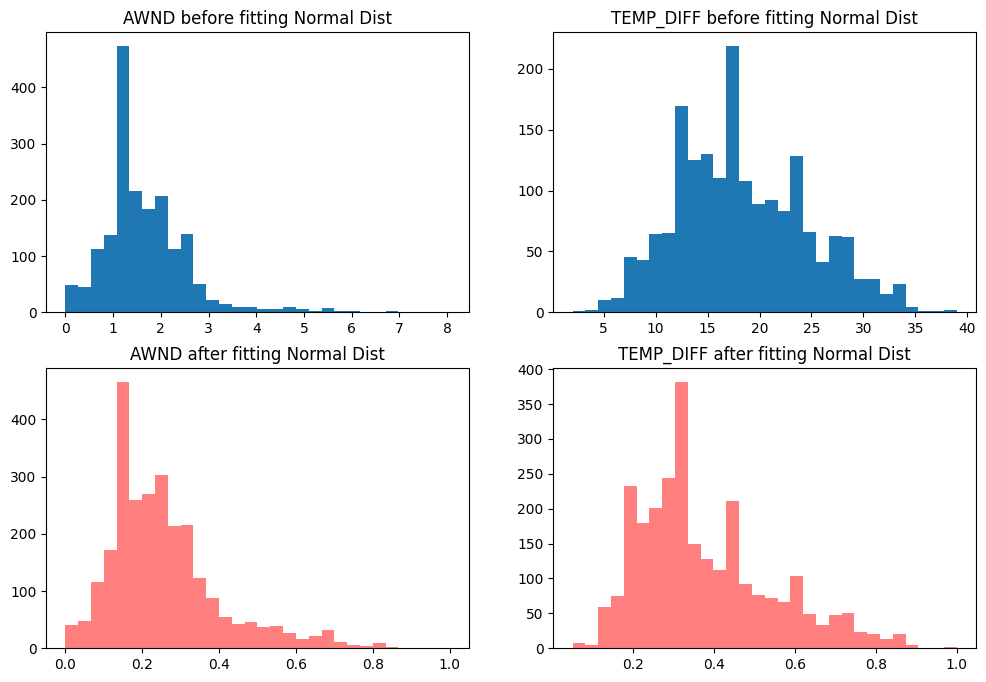

In [ ]:
fig, axs= plt.subplots(2,2, figsize=(12, 8))

axs[0,0].hist(df['AWND'], bins=30)
axs[0,0].set_title('AWND before fitting Normal Dist')
axs[0,1].hist(df['TEMP_DIFF'], bins=30)
axs[0,1].set_title('TEMP_DIFF before fitting Normal Dist')
axs[1,0].hist(dfnorm['AWND'],bins=30, color='r', alpha=0.5)
axs[1,0].set_title('AWND after fitting Normal Dist')
axs[1,1].hist(dfnorm['TEMP_DIFF'], bins=30, color='r', alpha=0.5)
axs[1,1].set_title('TEMP_DIFF after fitting Normal Dist')

plt.show()

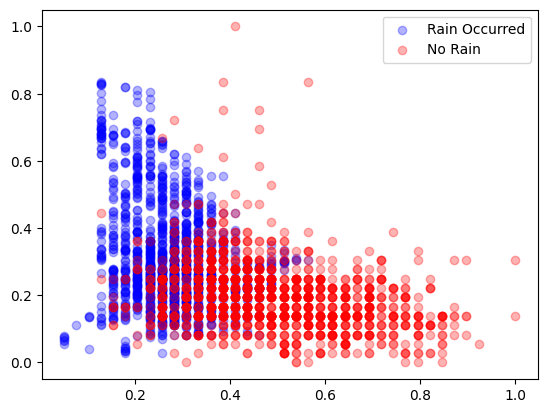

In [ ]:


plt.scatter(dfnorm.loc[dfnorm['PRCP'] == 1, 'TEMP_DIFF'],
            dfnorm.loc[dfnorm['PRCP'] == 1, 'AWND'],
            color='blue', label='Rain Occurred',alpha=0.3)

plt.legend()
plt.scatter(dfnorm.loc[dfnorm['PRCP'] == 0, 'TEMP_DIFF'],
            dfnorm.loc[dfnorm['PRCP'] == 0, 'AWND'],
            color='red', label='No Rain', alpha=0.3)
plt.legend()
plt.show()

# Classification using Neural Networks

In [ ]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

x= dfnorm.drop(['PRCP'],axis=1)
y= dfnorm['PRCP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nnmodel = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
nnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nnmodel.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred1 = nnmodel.predict(x_test)
y_pred1 = (y_pred1 > 0.5).astype(int)
acc3= accuracy_score(y_test,y_pred1)
roc3= roc_auc_score(y_test,y_pred1)
report= classification_report(y_test,y_pred1,output_dict=True)
report_df3 = pd.DataFrame(report).transpose()
report_df3


Epoch 1/50
54/54 [==============================] - 1s 7ms/step - loss: 0.6519 - accuracy: 0.6304 - val_loss: 0.6148 - val_accuracy: 0.7324
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7873 - val_loss: 0.5071 - val_accuracy: 0.7840
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.7861 - val_loss: 0.4477 - val_accuracy: 0.7746
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8108 - val_loss: 0.4169 - val_accuracy: 0.7958
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3958 - accuracy: 0.8155 - val_loss: 0.4017 - val_accuracy: 0.8028
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8173 - val_loss: 0.3887 - val_accuracy: 0.8099
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8220 - val_loss: 0.3870 - val_accuracy: 0.7817
Epoch 8/50
54/54 [==

,precision,recall,f1-score,support
0.0,0.869565,0.898876,0.883978,267.000000
1.0,0.894531,0.864151,0.879079,265.000000
accuracy,0.881579,0.881579,0.881579,0.881579
macro avg,0.882048,0.881514,0.881528,532.000000
weighted avg,0.882001,0.881579,0.881538,532.000000


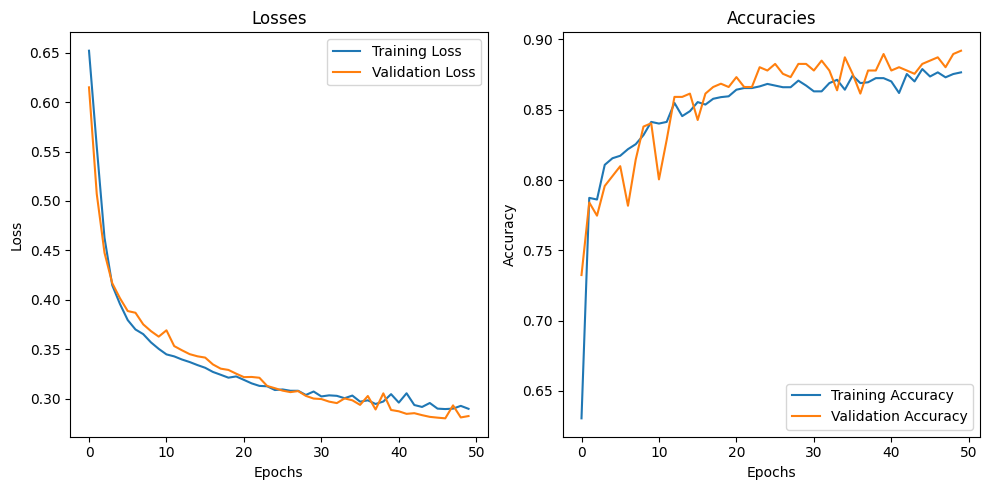

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<Axes: >

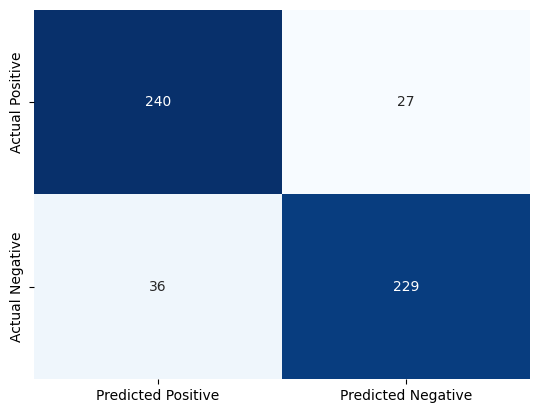

In [ ]:
cm= confusion_matrix(y_test,y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

Null Hypothesis Ho => Mean of residual =0, H1 => Mean of residual is not 0

In [ ]:
sample_mean= np.mean(y_test.values-y_pred1)
sample_std= np.std(y_test.values-y_pred1, ddof=1)
u=0
z= (sample_mean- u)/(sample_std/math.sqrt(x.size))
z_lower= u- t.cdf(0.05, x.size-2)
z_higher= u+ t.cdf(0.05, x.size-2)
print('Confidence intervals for Test statistics is (',z_lower, ' ,',z_higher, ')')
print('Value of Test Statistics is ',z)

Confidence intervals for Test statistics is ( -0.5199385711842266  , 0.5199385711842266 )
Value of Test Statistics is  3.4912902637457854


### Neural Networks used to classify whether rain occued on a particular day was succesfull on test data at an accuracy of 88%. But we will have to reject the above hypothesis since value of test statistics is not in the confidence interval for our Test statistics.